# Survival models

Survival models, often used in survival analysis, are statistical models that deal with time-to-event data. This kind of analysis is commonly used in medical research to **study the time until an event of interest (e.g., death, relapse) occurs**. It can also be applied in other fields such as engineering (time until failure of a machine), economics (time until a company defaults), and more.

Key concepts in survival analysis include:

**Survival Function (S(t)):** This represents the probability that the *event of interest has not occurred by time 
𝑡*

**Hazard Function (λ(t)):** This represents the *instantaneous rate at which events occur*, given that no event has occurred up to time 
𝑡  


In [3]:
if (!is.element('survival', installed.packages()[, 1])) {
  install.packages('survival')
}
library(survival)

In [ ]:
if (!is.element('survminer', installed.packages()[, 1])) {
  install.packages('survminer')
}
library(survminer)

The lung dataset contains information about patients with advanced lung cancer, including the survival time, status (1=censored, 2=event), age, sex, and other covariates.

In [6]:
head(lung)
unique(lung$sex)

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,306,2,74,1,1,90,100,1175,NA
2,3,455,2,68,1,0,90,90,1225,15
3,3,1010,1,56,1,0,90,90,NA,15
4,5,210,2,57,1,1,90,60,1150,11
5,1,883,2,60,1,0,100,90,NA,0
6,12,1022,1,74,1,1,50,80,513,0


[1] 1 2

### Kaplan-Meier Estimator Formula

The **Kaplan-Meier estimator** is used to estimate the **survival function** from lifetime data. Mathematically, the Kaplan-Meier estimator, also known as the product-limit estimator, is defined as follows:

Given $n$ observed times $t_1, t_2, \ldots, t_n$ and corresponding event indicators $\delta_i$ (where $\delta_i = 1$ if the event occurred at time $t_i$ and $\delta_i = 0$ if the data is censored at time $t_i$), the Kaplan-Meier estimator for the survival function $S(t)$ at time $t$ is:

$$\hat{S}(t) = \prod_{t_i \le t} \left( 1 - \frac{d_i}{n_i} \right)$$

where:
- $d_i$ is the number of events (e.g., deaths) that occur at time $t_i$.
- $n_i$ is the number of individuals at risk just before time $t_i$.

### Step-by-Step Calculation

1. **Sort the Data**: Order the observed times $t_1, t_2, \ldots, t_n$ in ascending order.
2. **Identify Events and Censoring**: For each time $t_i$, determine if it is an event or censored data.
3. **Calculate $d_i$ and $n_i$**: For each unique event time $t_i$, calculate the number of events $d_i$ and the number of individuals at risk $n_i$ just before $t_i$.
4. **Compute the Survival Probability**: Use the formula to compute the survival probability $\hat{S}(t)$ for each time point $t$.

### Example Calculation

Let's consider a simple example with a small dataset.

| Time (t) | Status ($\delta$) |
|----------|-----------------------|
| 2        | 1                     |
| 3        | 0                     |
| 4        | 1                     |
| 5        | 1                     |
| 6        | 0                     |

1. **Sort the Data**: The data is already sorted in ascending order of time.

2. **Identify Events and Censoring**:
   - At time 2, there is 1 event ($\delta = 1$).
   - At time 3, the data is censored ($\delta = 0$).
   - At time 4, there is 1 event ($\delta = 1$).
   - At time 5, there is 1 event ($\delta = 1$).
   - At time 6, the data is censored ($\delta = 0$).

3. **Calculate $d_i$ and $n_i$**:
   - At time 2: $d_2 = 1$, $n_2 = 5$ (5 individuals at risk).
   - At time 4: $d_4 = 1$, $n_4 = 3$ (3 individuals at risk after time 2 and censoring at time 3).
   - At time 5: $d_5 = 1$, $n_5 = 2$ (2 individuals at risk after events at times 2 and 4).

4. **Compute the Survival Probability**:
  $$
   \hat{S}(t) = \prod_{t_i \le t} \left( 1 - \frac{d_i}{n_i} \right)
  $$

   - At time 2: $\hat{S}(2) = 1 \times \left( 1 - \frac{1}{5} \right) = 1 \times 0.8 = 0.8$
   - At time 4: $\hat{S}(4) = 0.8 \times \left( 1 - \frac{1}{3} \right) = 0.8 \times 0.6667 \approx 0.5333$
   - At time 5: $\hat{S}(5) = 0.5333 \times \left( 1 - \frac{1}{2} \right) = 0.5333 \times 0.5 = 0.2667$

Thus, the Kaplan-Meier survival probabilities at times 2, 4, and 5 are approximately 0.8, 0.5333, and 0.2667, respectively.

### R Function for Kaplan-Meier Estimator

Here's a custom R function to manually compute the Kaplan-Meier estimator:



In [20]:

kaplan_meier <- function(times, status) {
  # Sort the times and corresponding status
  data <- data.frame(times, status)
  data <- data[order(data$times), ]
  
  times <- data$times
  status <- data$status
  
  # Unique event times
  event_times <- unique(times[status == 1])
  
  # Initialize variables
  n <- length(times)
  surv_prob <- rep(1, length(event_times))
  
  # Compute Kaplan-Meier estimates
  for (i in seq_along(event_times)) {
    t <- event_times[i]
    d <- sum(times == t & status == 1)
    n_at_risk <- sum(times >= t)
    
    if (i == 1) {
      surv_prob[i] <- 1 - d / n_at_risk
    } else {
      surv_prob[i] <- surv_prob[i - 1] * (1 - d / n_at_risk)
    }
  }
  
  # Create a data frame with results
  result <- data.frame(
    time = event_times,
    survival = surv_prob
  )
  
  return(result)
}

# Example usage
times <- c(2, 3, 4, 5, 6)
status <- c(1, 0, 1, 1, 0)

km_result <- kaplan_meier(times, status)
print(km_result)


  time  survival
1    2 0.8000000
2    4 0.5333333
3    5 0.2666667


This function sorts the data, calculates the number of events and individuals at risk at each unique event time, and then computes the Kaplan-Meier survival probabilities.

### Event

In survival analysis, it's crucial to differentiate between **events that have occurred and censored observations**. Here is a detailed explanation of both:

An event occurred when the subject of the study experiences the event of interest during the observation period. In survival analysis, this event is often referred to as the failure or event time. The event could be:
- Death in a clinical study.
- Disease recurrence.
- Equipment failure in reliability analysis.

**Key Points:**
- The exact time of the event is known.
- The event is recorded as an occurrence (usually indicated by 1 in binary status variables).

### Censoring

Censoring occurs when the exact time of the event is not known. This situation arises when the observation period ends before the event occurs or when the subject leaves the study early. There are several types of censoring:
- **Right Censoring:** The most common type, where the event has not occurred by the end of the study period.
- **Left Censoring:** The event has occurred before the subject enters the study.
- **Interval Censoring:** The event occurs within a known time interval, but the exact time is not known.

**Key Points:**
- The exact time of the event is unknown.
- The observation period ends without observing the event.
- The data is recorded as censored (usually indicated by 0 in binary status variables).

### Examples

**Event Occurred:**
- A patient dies at 150 days after entering a clinical trial. The time-to-event is recorded as 150 days with an event status of 1.
- A machine fails at 200 hours of operation. The time-to-event is recorded as 200 hours with an event status of 1.

**Censoring:**
- A patient is still alive after 300 days of follow-up in a clinical trial. The follow-up time is recorded as 300 days with a censored status of 0.
- A study participant withdraws from a trial at 180 days without experiencing the event. The follow-up time is recorded as 180 days with a censored status of 0.



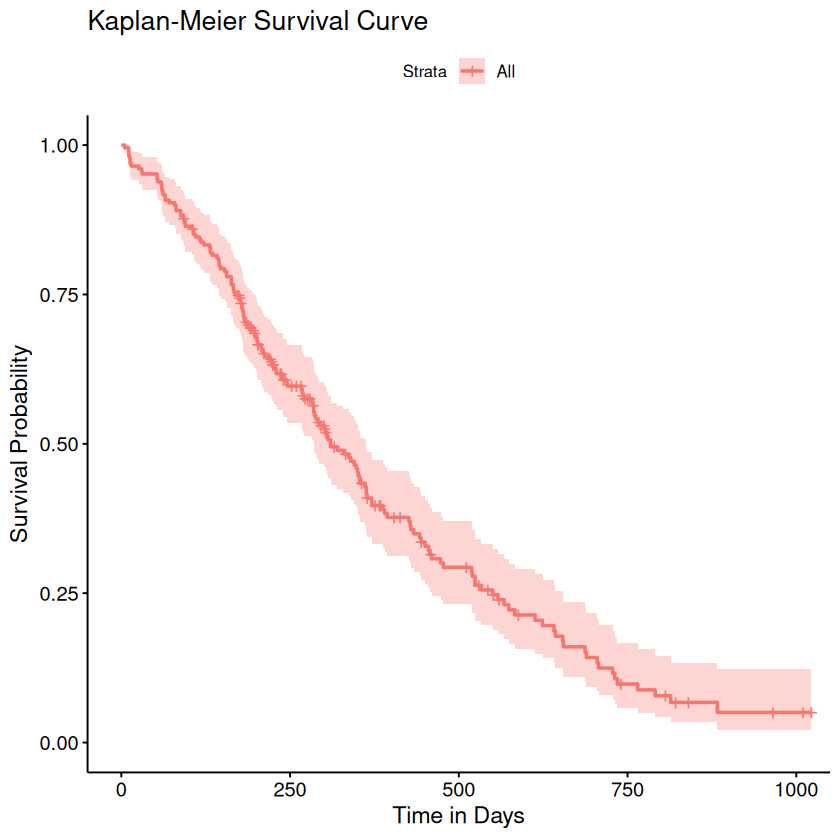

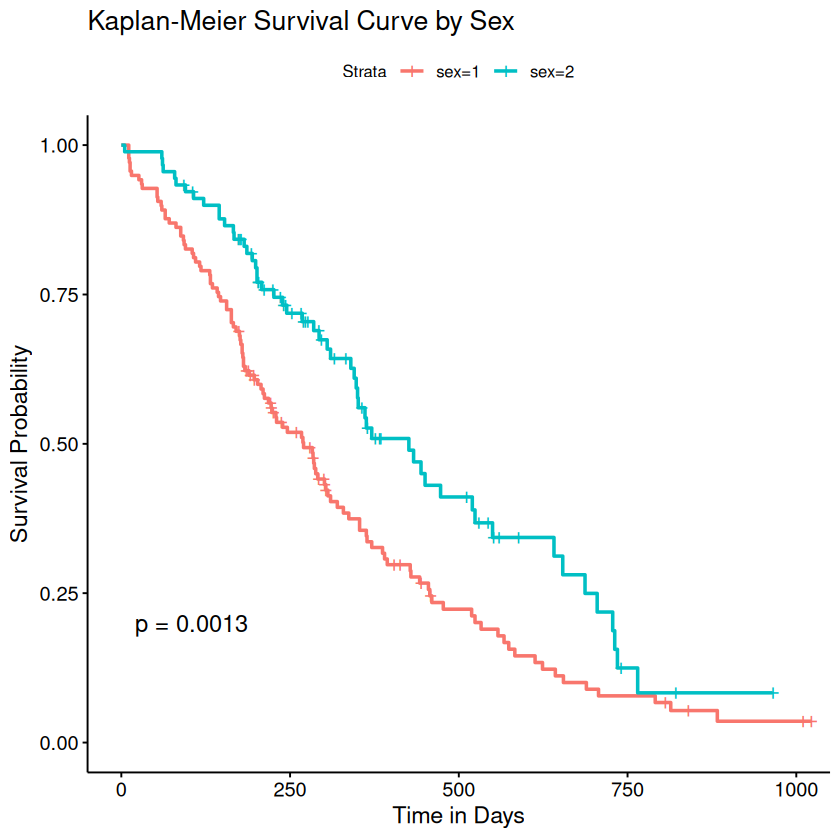

In [14]:
# Fit the Kaplan-Meier Estimator
km_fit <- survfit(Surv(time, status) ~ 1, data = lung)

# Summary of the Kaplan-Meier Estimator
summary(km_fit) |> invisible()

# Plot the Kaplan-Meier Curve
ggsurvplot(km_fit, data = lung, 
           xlab = "Time in Days", 
           ylab = "Survival Probability",
           title = "Kaplan-Meier Survival Curve")

# Kaplan-Meier Estimator by Groups (e.g., by sex)
km_fit_sex <- survfit(Surv(time, status) ~ sex, data = lung)

ggsurvplot(km_fit_sex, data = lung, 
           pval = TRUE, 
           xlab = "Time in Days", 
           ylab = "Survival Probability",
           title = "Kaplan-Meier Survival Curve by Sex")

**Kaplan-Meier Curve:** Shows the estimated survival probability over time. If stratified by a variable (like sex), it compares the survival curves for different groups.

### Cox Model

In the **Cox Proportional Hazards model**, **covariates are the explanatory variables that are used to predict the hazard function**. These covariates can be continuous (e.g., age, blood pressure) or categorical (e.g., gender, treatment group). The Cox model assesses the effect of these covariates on the hazard rate.

The Cox model is expressed as:
$$\lambda(t \mid X) = \lambda_0(t) \exp(\beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p)$$

$$\lambda(t|X) = \lambda_0(t) \exp\left( \sum\limits_{i=1}^{p} \beta_i X_i \right)$$

where:
- $\lambda(t \mid X)$ is the hazard function at time $t$ given covariates $X$.
- $\lambda_0(t)$ is the baseline hazard function (the hazard when all covariates are zero).
- $X_1, X_2, \ldots, X_p$ are the covariates.
- $\beta_1, \beta_2, \ldots, \beta_p$ are the coefficients associated with each covariate, which need to be estimated from the data.


#### Fit a Cox Proportional Hazards Model

Let's include `age` and `sex` as covariates:



In [15]:
cox_fit <- coxph(Surv(time, status) ~ age + sex, data = lung)
summary(cox_fit)

Call:
coxph(formula = Surv(time, status) ~ age + sex, data = lung)

  n= 228, number of events= 165 

         coef exp(coef)  se(coef)      z Pr(>|z|)   
age  0.017045  1.017191  0.009223  1.848  0.06459 . 
sex -0.513219  0.598566  0.167458 -3.065  0.00218 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

    exp(coef) exp(-coef) lower .95 upper .95
age    1.0172     0.9831    0.9990    1.0357
sex    0.5986     1.6707    0.4311    0.8311

Concordance= 0.603  (se = 0.025 )
Likelihood ratio test= 14.12  on 2 df,   p=9e-04
Wald test            = 13.47  on 2 df,   p=0.001
Score (logrank) test = 13.72  on 2 df,   p=0.001


#### Interpretation of Results

The `summary(cox_fit)` function will provide the following key outputs:

1. **Coefficients** (`coef`): Estimates of the effect size for each covariate.
2. **Exponentiated Coefficients** (`exp(coef)`): These are the hazard ratios. A hazard ratio greater than 1 indicates an increased risk of the event for higher values of the covariate, and less than 1 indicates a decreased risk.
3. **Standard Error** (`se(coef)`): The standard error of the coefficient estimates.
4. **z-value** and **p-value**: Test statistics and associated p-values for the hypothesis that each coefficient is zero.

#### Example Output Interpretation



- **age**: The coefficient for `age` is 0.017045, and the hazard ratio is 1.017191. This means that each additional year of age increases the hazard by approximately 1.7191%.
- **sex**: The coefficient for `sex` is -0.5132, and the hazard ratio is 0.5985. This indicates that being female (assuming `sex` is coded as 1 for male and 2 for female) is associated with a 40% decrease in the hazard compared to being male.



#### 4. Visualize the Cox Model


- **ggcoxzph**: Plots the Schoenfeld residuals to check the proportional hazards assumption.
- **ggsurvplot**: Plots the survival curves based on the Cox model.


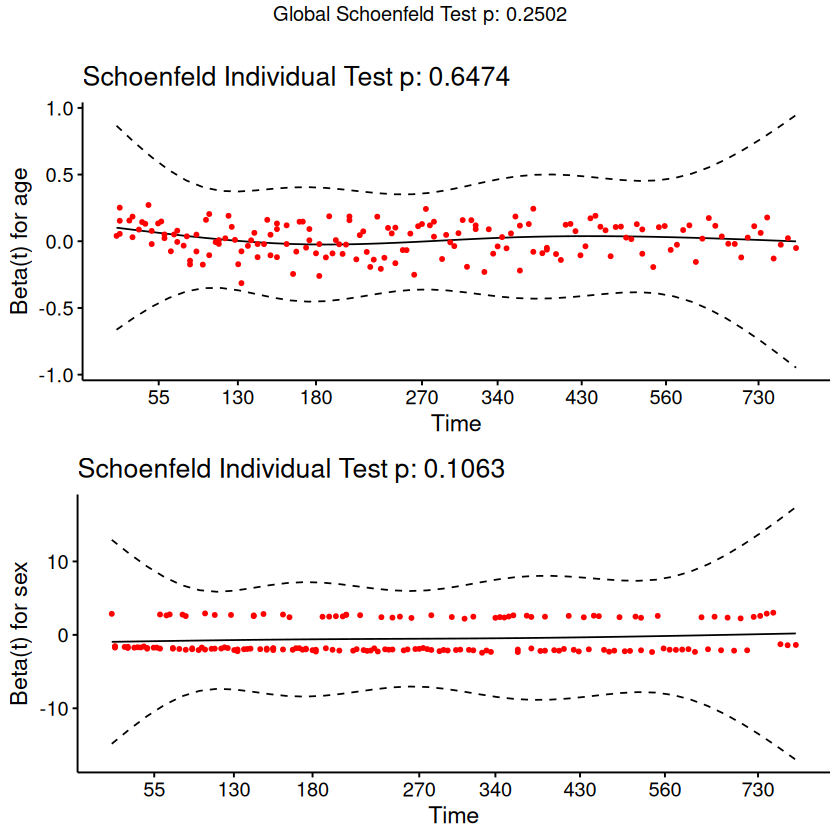

In [22]:
ggcoxzph(cox.zph(cox_fit))


**ggcoxzph** is a function in the `survminer` package for R, which is used for visualizing the Schoenfeld residuals from a Cox proportional hazards model. This helps in checking the proportional hazards assumption, which is a critical aspect of Cox regression analysis.

### Proportional Hazards Assumption
The proportional hazards assumption states that the ratio of the hazard functions of two individuals is constant over time. Violating this assumption can lead to incorrect conclusions from the model.

### Schoenfeld Residuals
Schoenfeld residuals are used to test the proportional hazards assumption. These residuals should be independent of time if the proportional hazards assumption holds. Plotting these residuals against time can help visually assess whether this assumption is met.


#### Output
The function produces a series of plots:
- Each plot corresponds to a predictor variable in the Cox model.
- The x-axis represents time.
- The y-axis represents the scaled Schoenfeld residuals.
- A smooth line through the residuals is added to help visualize any trends over time.
- A horizontal line at y = 0 indicates the expected value if the proportional hazards assumption holds.

### Interpretation
- If the smooth line is approximately horizontal and centered around zero, the proportional hazards assumption is likely met.
- If the line shows a systematic trend (e.g., increasing or decreasing over time), this suggests that the proportional hazards assumption may be violated for that predictor.


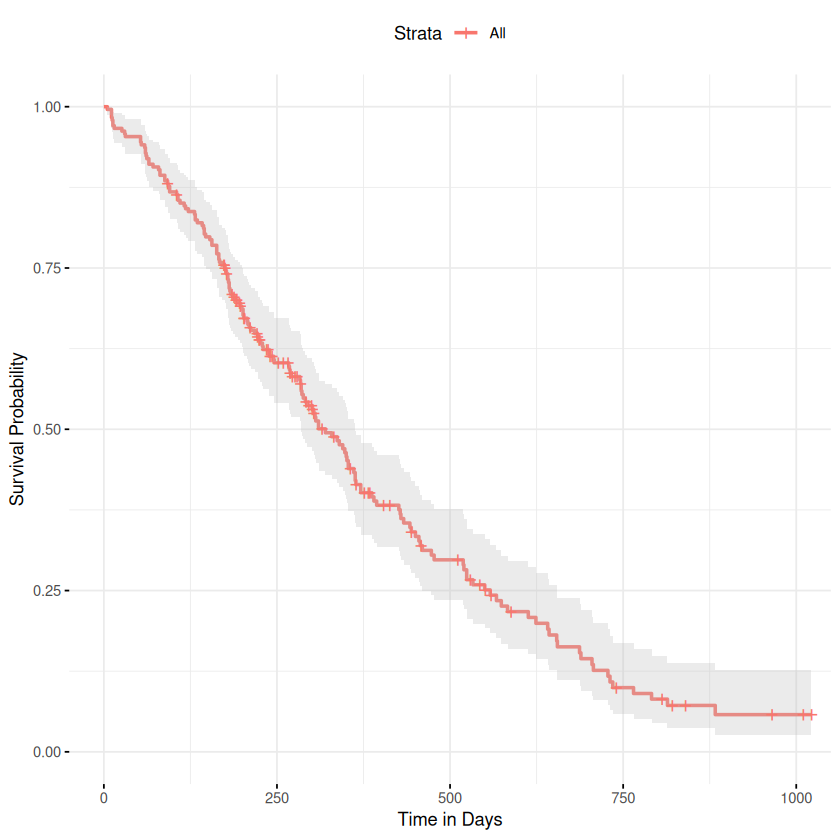

In [21]:
ggsurvplot(survfit(cox_fit), data = lung, conf.int = TRUE, 
           ggtheme = theme_minimal(), xlab = "Time in Days", ylab = "Survival Probability")



### Adding More Covariates

You can include more covariates in the model:


In [17]:
cox_fit_more <- coxph(Surv(time, status) ~ age + sex + ph.ecog + wt.loss, data = lung)
summary(cox_fit_more)


Call:
coxph(formula = Surv(time, status) ~ age + sex + ph.ecog + wt.loss, 
    data = lung)

  n= 213, number of events= 151 
   (15 observations deleted due to missingness)

             coef exp(coef)  se(coef)      z Pr(>|z|)    
age      0.013369  1.013459  0.009628  1.389 0.164951    
sex     -0.590775  0.553898  0.175339 -3.369 0.000754 ***
ph.ecog  0.515111  1.673824  0.125988  4.089 4.34e-05 ***
wt.loss -0.009006  0.991034  0.006658 -1.353 0.176135    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

        exp(coef) exp(-coef) lower .95 upper .95
age        1.0135     0.9867    0.9945    1.0328
sex        0.5539     1.8054    0.3928    0.7811
ph.ecog    1.6738     0.5974    1.3076    2.1427
wt.loss    0.9910     1.0090    0.9782    1.0041

Concordance= 0.647  (se = 0.026 )
Likelihood ratio test= 31.02  on 4 df,   p=3e-06
Wald test            = 29.94  on 4 df,   p=5e-06
Score (logrank) test = 30.65  on 4 df,   p=4e-06


This model includes `ph.ecog` (Eastern Cooperative Oncology Group performance score) and `wt.loss` (weight loss) as additional covariates.

By including covariates in the Cox Proportional Hazards model, you can assess how different factors affect the hazard rate for the event of interest. The `survival` package in R provides tools to fit these models and interpret the results, helping to understand the impact of each covariate on survival outcomes.

### Partial Likelihood (Cox)

The Cox model estimates the coefficients $\beta$ using the partial likelihood, which does not require the baseline hazard function $\lambda_0(t)$. The partial likelihood for $n$ observed event times $t_1, t_2, \ldots, t_n$ is:

$$L(\beta) = \prod_{i=1}^n \frac{\exp(\beta^T \mathbf{X_i})}{\sum_{j \in R(t_i)} \exp(\beta^T \mathbf{X_j})}$$

where:
- $\beta^T \mathbf{X_i}$ is the linear predictor for individual $i$.
- $R(t_i)$ is the risk set at time $t_i$, i.e., the set of individuals who are at risk just before time $t_i$.

### Log-Partial Likelihood

The log-partial likelihood is more commonly used for computational purposes:

$$\ell(\beta) = \sum_{i=1}^n \left( \beta^T \mathbf{X_i} - \log \sum_{j \in R(t_i)} \exp(\beta^T \mathbf{X_j}) \right)$$

The coefficients $\beta$ are estimated by maximizing this log-partial likelihood.
